# Example of polarization line fitting

In this example we demonstrate the fitting of an inter-dot transition line (also known as polarization line), by using the functions `fit_pol_all` and `polmod_all_2slopes`. This fitting is useful for determining the tunnel coupling between two quantum dots. More theoretical background about this can be found in [L. DiCarlo et al., Phys. Rev. Lett. 92, 226801 (2004)](https://doi.org/10.1103/PhysRevLett.92.226801) and [Diepen et al., Appl. Phys. Lett. 113, 033101 (2018)](https://doi.org/10.1063/1.5031034).

Sjaak van diepen - sjaak.vandiepen@tno.nl

#### Import the modules used in this example.

In [4]:
import os
import scipy.constants
import matplotlib.pyplot as plt
%matplotlib inline

import qcodes
from qcodes.data.hdf5_format import HDF5Format
import qtt
from qtt.algorithms.tunneling import fit_pol_all, polmod_all_2slopes, plot_polarization_fit
from qtt.data import load_example_dataset

#### Define some physical constants.

The fitting needs some input values: Plancks constan, the Boltzmann constant and the effective electron temperature. The effective electron temperature is the temperature of the electrons in the quantum dots. A method to determine this temperature is to do the polarization line scan at very low tunnel coupling and then fit the polarization line relative to the temperature. Here, we estimate the electron temperature to be 75 mK.

In [2]:
h = scipy.constants.physical_constants['Planck constant in eV s'][0]*1e15  # ueV/GHz; Planck's constant in eV/Hz*1e15 -> ueV/GHz
kb = scipy.constants.physical_constants['Boltzmann constant in eV/K'][0]*1e6  # ueV/K; Boltzmann constant in eV/K*1e6 -> ueV/K
kT = 75e-3 * kb  # effective electron temperature in ueV

#### Load example data.

Here we load an example dataset. The array 'delta' contains the difference in chemical potential between the two dots. The values for this array are in units of ueV. The fitting is not linear in the values of delta, hence to do the fitting, it is the easiest to convert the voltages on the gates to energies using the leverarm. The lever arm can be detmined in several ways, e.g. by using photon-assisted-tunneling (see example PAT), or by means of bias triangles (see example bias triangles). 
The array 'signal' contains the data for the sensor signal, usually measured using RF reflectometry on a sensing dot. The units for this array are arbitrary.

In [5]:
dataset = load_example_dataset('2017-02-21/15-59-56')
detuning = dataset.delta.ndarray
signal = dataset.signal.ndarray

#### Fit.

The `fit_pol_all` function returns an array with the following parameters:
- fitted_parameters[0]: tunnel coupling in ueV
- fitted_parameters[1]: offset in x_data for center of transition
- fitted_parameters[2]: offset in background signal
- fitted_parameters[3]: slope of sensor signal on left side
- fitted_parameters[4]: slope of sensor signal on right side
- fitted_parameters[5]: height of transition, i.e. sensitivity for electron transition

In [13]:
fitted_parameters, _, fit_results = fit_pol_all(detuning, signal, kT)

#### Plot the fit and the data.

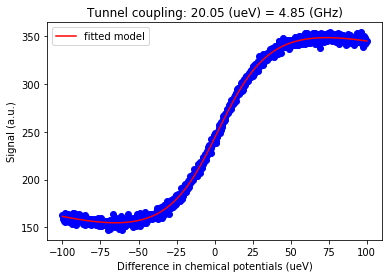

In [7]:
plot_polarization_fit(detuning, signal, fit_results, fig = 100)

In [8]:
print(fit_results)

{'fitted_parameters': array([ 20.04952337,   1.96624846, 100.24813846,  -0.49990949,
        -0.43654599, 299.13971659]), 'initial_parameters': array([ 6.66666667e+00,  5.50550556e+00,  1.58893888e+02, -1.44537853e-01,
       -1.44537853e-01,  2.14806828e+02]), 'type': 'polarization fit', 'kT': 6.462997725}


The values of the model can be calculated as with the method `polmod_all_2slopes`. For example to calculate the value of the sensor at detuning zero:

In [12]:
polmod_all_2slopes([0], fitted_parameters, kT)

array([243.44568493])